In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
from google.colab import files

In [49]:
# files.upload()

In [50]:
df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [51]:
X = df.drop(columns = 'label')
y = df.label

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77, test_size = .20)

In [52]:
X_train.shape

(48000, 784)

In [53]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59747,0,0,0,0,0,0,0,0,0,38,...,47,0,1,0,0,0,0,0,0,0
54501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55873,0,0,0,0,0,0,0,0,6,10,...,0,0,0,31,54,19,0,0,0,0
6524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57904,0,0,0,0,0,0,0,0,0,0,...,113,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42277,0,0,0,0,0,0,0,7,87,145,...,153,131,167,123,0,0,0,0,0,0
18667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
np.sqrt(784)

28.0

In [55]:
X_train = X_train / 255
X_test = X_test / 255

In [56]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,28,28,1)

In [57]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,28,28,1)

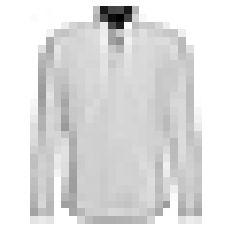

In [58]:
plt.axis('off')
plt.imshow(X_train[7], cmap='binary');

In [101]:
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [102]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [103]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=10
)

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.5654 - acc: 0.7941 - val_loss: 0.3554 - val_acc: 0.8720
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3462 - acc: 0.8738 - val_loss: 0.3108 - val_acc: 0.8851
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2900 - acc: 0.8945 - val_loss: 0.2740 - val_acc: 0.8983
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2529 - acc: 0.9071 - val_loss: 0.2607 - val_acc: 0.9023
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2242 - acc: 0.9170 - val_loss: 0.2453 - val_acc: 0.9087
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1989 - acc: 0.9270 - val_loss: 0.2376 - val_acc: 0.9107
Epoch 7/10
375/375 [==============================] - 4s 9ms/step - loss: 0.1761 - acc: 0.9355 - val_loss: 0.2438 - val_acc: 0.9128
Epoch 8/10
375/375 [==============================] - 2s 6ms/step - loss: 0

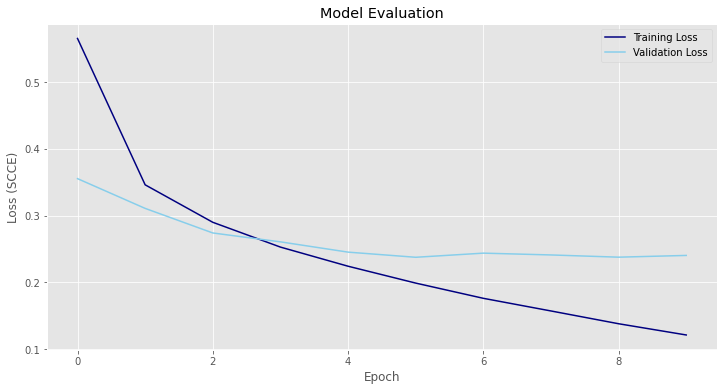

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.title('Model Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss (SCCE)')
plt.legend();

In [81]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 1s 3ms/step - loss: 0.2337 - acc: 0.9181


[0.2337355762720108, 0.9180833101272583]

In [78]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

375/375 [==============================] - 1s 2ms/step


array([0, 5, 8, ..., 4, 1, 6])

In [82]:
y_test = y_test.to_numpy()

In [85]:
class_map = {
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:"Sneaker",
    8:'Bag',
    9:'Ankle boot'
}

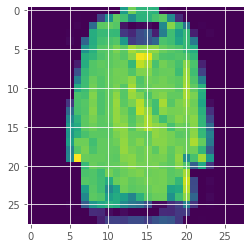

We thought = Coat, but really Shirt


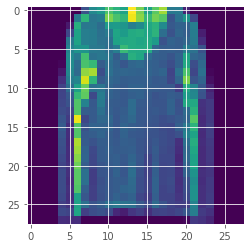

We thought = Shirt, but really Pullover


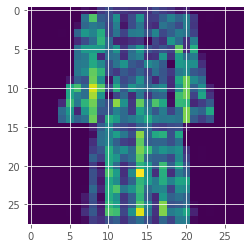

We thought = Shirt, but really Dress


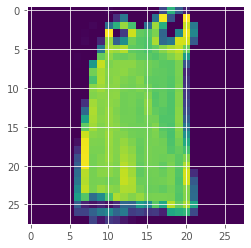

We thought = Shirt, but really T-shirt


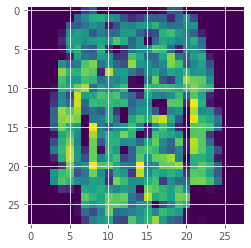

We thought = Shirt, but really T-shirt


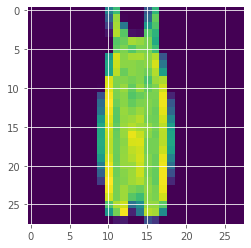

We thought = Dress, but really Trouser


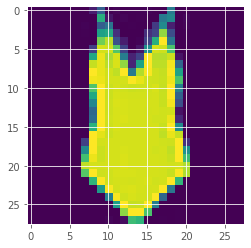

We thought = Shirt, but really T-shirt


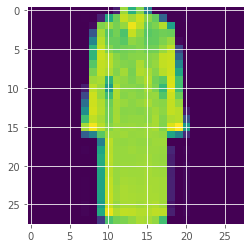

We thought = Coat, but really Dress


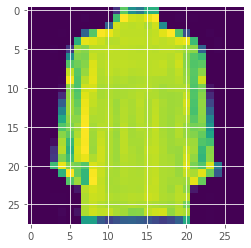

We thought = Coat, but really Shirt


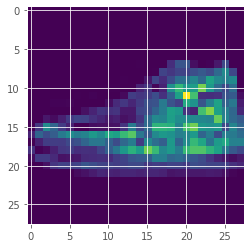

We thought = Sneaker, but really Ankle boot


In [112]:
# From the lesson on CNNs
wrong_ix = np.where(y_pred != y_test)[0]
for i in wrong_ix[:10]:
    plt.clf()
    plt.imshow(X_test[i])
    plt.show()
    pred = y_pred[i]
    truth = y_test[i]
    print(f'We thought = {class_map[pred]}, but really {class_map[truth]}',end = '\n')

## Now using full dataset:

In [113]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X_test = test_df.drop(columns='label')
X_train = df.drop(columns='label')
y_train = df['label']

In [117]:
X_train = X_train.to_numpy()
X_train = X_train / 255
X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.to_numpy()
X_test = X_test/255
X_test = X_test.reshape(-1,28,28,1)

y_train = y_train.to_numpy()

In [121]:
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [122]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [123]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10
)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.5094 - acc: 0.8143
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3149 - acc: 0.8850
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2641 - acc: 0.9033
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2291 - acc: 0.9157
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2016 - acc: 0.9257
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1788 - acc: 0.9330
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1567 - acc: 0.9414
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1395 - acc: 0.9484
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1216 - acc: 0.9554
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1058 - acc: 0.9612


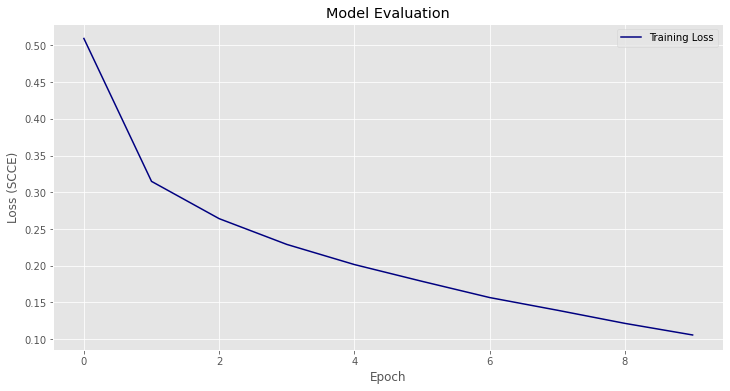

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.title('Model Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss (SCCE)')
plt.legend();

In [129]:
preds = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 3ms/step


In [130]:
preds

array([0, 1, 2, ..., 8, 8, 1])

In [138]:
submit = pd.DataFrame(preds).rename(columns={0:'pred_class'})

In [139]:
submit.head()

,pred_class
0,0
1,1
2,2
3,4
4,3


In [140]:
submit.to_csv('group1-hackathon-p4.csv')

In [141]:
# files.download('group1-hackathon-p4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>